<a href="https://colab.research.google.com/github/samobrien878/wrangling/blob/main/Copy_of_assignment2_checkpoint_completed!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper gives an overview on what tidy data is, how to do make untidy data tidy, and how it is useful for analysis.
2. The tidy standard is intended to help those cleaning data to have a starting point to work towards. Rather than going in blind to what "tidy" data actual is, the standarize helps save time and give direction during the often tedious process of cleaning data.
3.
  a. The first sentence is emphasizing that even though data may be similar in layout (ie: has variables, has types of data), each set comes with a unique set of problems and characteristics.
  b. The second sentence is emphasizing the importance of context with data. For instance, depenending on what you have collected and what the purpose of your data is, the definition of "variable" can easily change. The same goes for observations.
4. Variables have all values that measure the same attribute. Observations are all of the values measured on the same unit. Values are some combination of quanitative or qualitative data.
5. Tidy data is:
  a: Each variable has a column
  b: Each observation (unit) has a row
  c: Each observational unit forms a table
6. The 5 most common problems:
  1. Column titles are values, not variables
  2. 2 or more variables in one column
  3. variables are in both rows and columns
  4. multiple types of observational units are stored in the same table.
  5. A single observational unit is stored in multiple tables.
- The data in table four is messy because the column titles are values, not variables.
- Melting data means to turn the columns into rows, many people call it casting data from wide to long.
7. Table 11 is messy because there are multiple values in both the columns and the value slots, and many colvars need to be melted together. Table 12 is molten because even though it is mostly clean, the element column has 2 variables in it that need to be melted.
8. The chicken and the egg problem is that tidyness of data is limited by the tools to make it tidy. Those tool in return are linked to tidy data, making it very dificult to improve on the process to prep messy data for analysis. Wickham hopes that people will create large concentrated efforts to improve on his tools, to create more consise and efficient methods to tidy data.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

1

In [14]:

import pandas as pd
df = pd.read_csv('college_completion.csv')
df


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,3793,461528,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,43,81,NaN,NaN,12.0
3794,3794,462354,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74,81,NaN,NaN,33.0
3795,3795,466921,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20,81,NaN,NaN,8.0
3796,3796,474881,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,81,NaN,NaN,145.0


2

In [3]:
pd.crosstab(df['control'],df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


3

Two main takeaways:
 There appear to be many more 4-year universities than 2 year universities.Of those univerisities most seem to be private and not-for-profit.

4

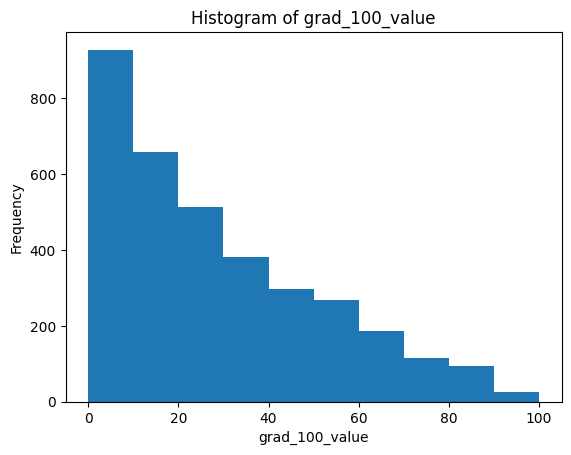

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df['grad_100_value'])
plt.xlabel('grad_100_value')
plt.ylabel('Frequency')
plt.title('Histogram of grad_100_value')
plt.show()

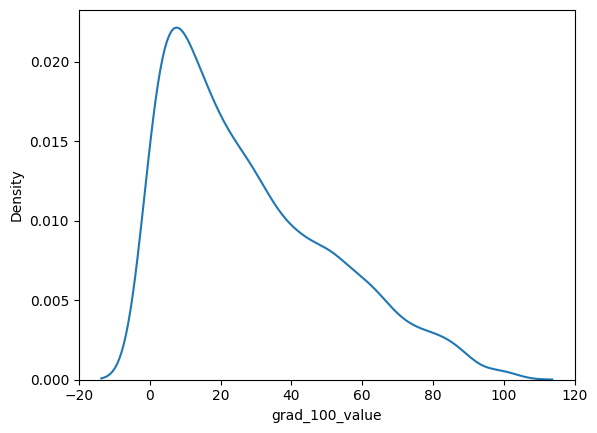

In [10]:
sns.kdeplot(data=df, x='grad_100_value')
plt.show()

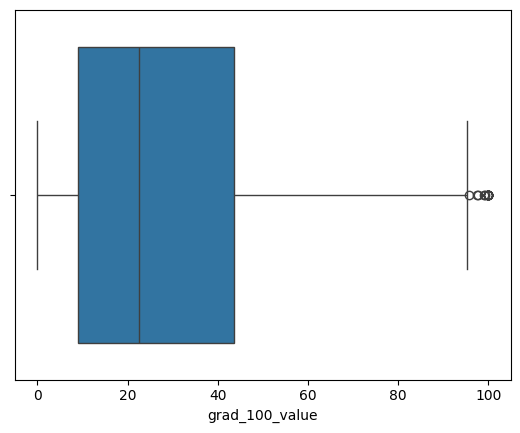

In [11]:
sns.boxplot(data=df, x='grad_100_value')
plt.show()

In [13]:
print(df['grad_100_value'].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


5

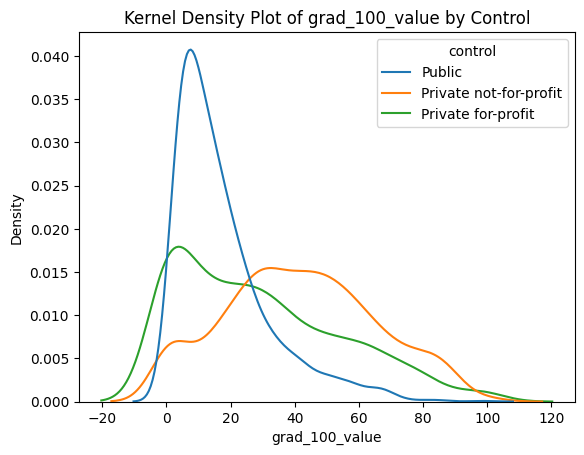

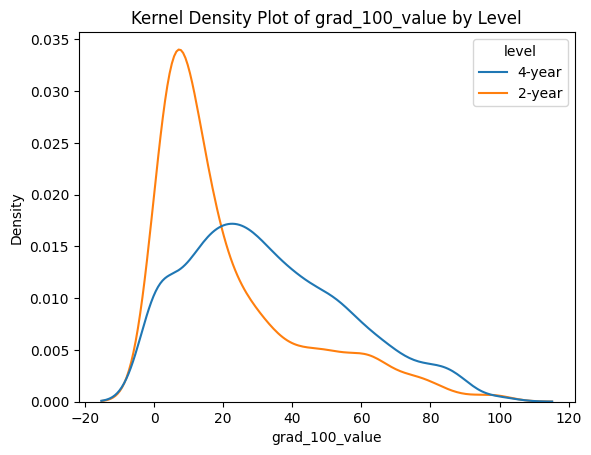

In [17]:
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.show()

sns.kdeplot(data=df, x='grad_100_value', hue='level', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.show()

It appears as though, generally speaking, that 4 year universities that are private not for profit have the overall best graduation rate. Or most instances of graduation at the higher pertencage level.

In [29]:
print(df.groupby(['level','control'])['grad_100_value'].describe())

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

It appears that 4 year, private for profit universities have the best graduation rates.

6

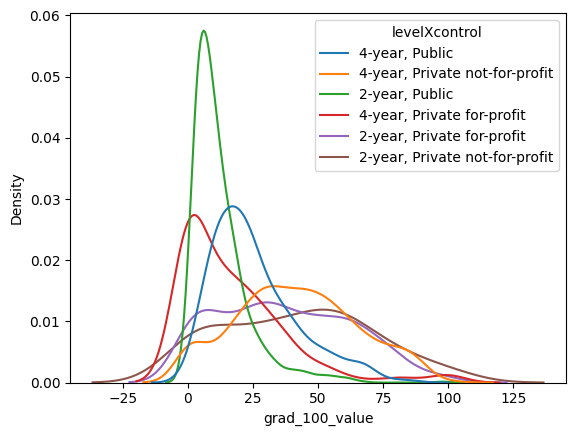

In [21]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', common_norm=False)
plt.show()

Once again, it appears that 4 year private not for profit insitutions have the best graduation rates.

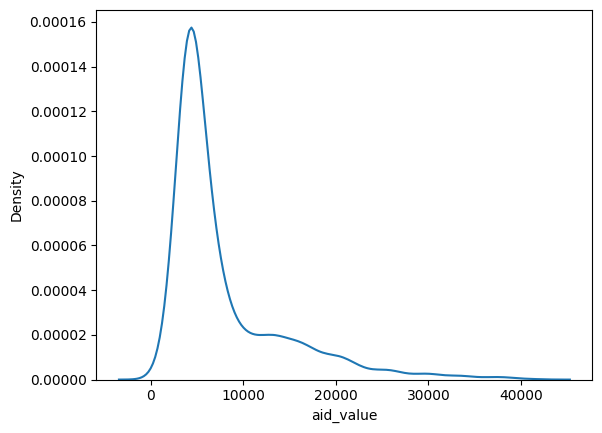

In [22]:
sns.kdeplot(data=df, x='aid_value')
plt.show()

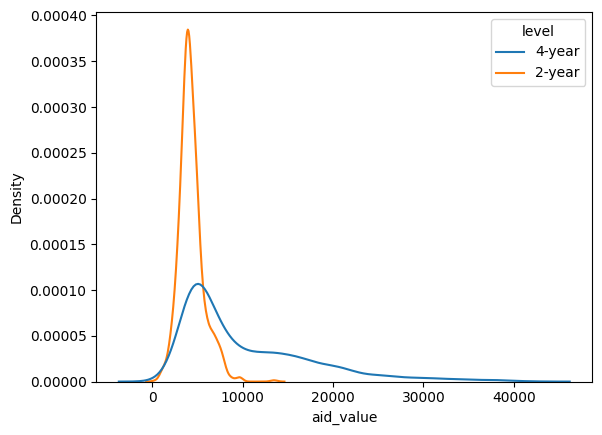

In [24]:
sns.kdeplot(data=df, x='aid_value', hue='level', common_norm=False)
plt.show()

7

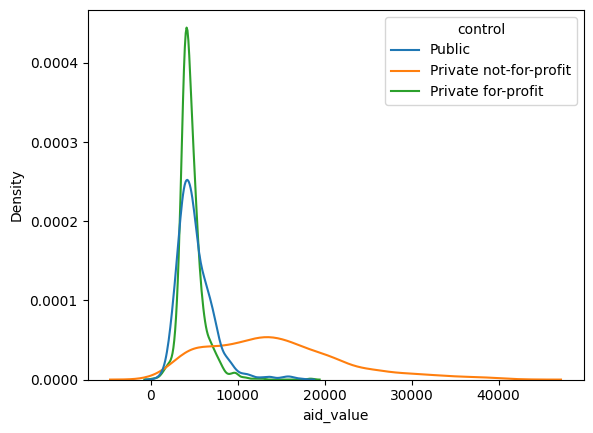

In [26]:
sns.kdeplot(data=df, x='aid_value', hue='control', common_norm=False)
plt.show()

In [30]:
print(df.groupby(['level', 'control'])['aid_value'].describe())

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

8

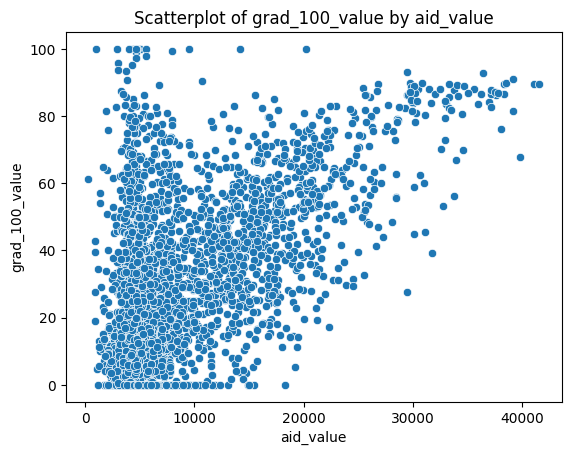

In [31]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.show()

Generally speaking, as more aid is given there are higher rates of graduation.

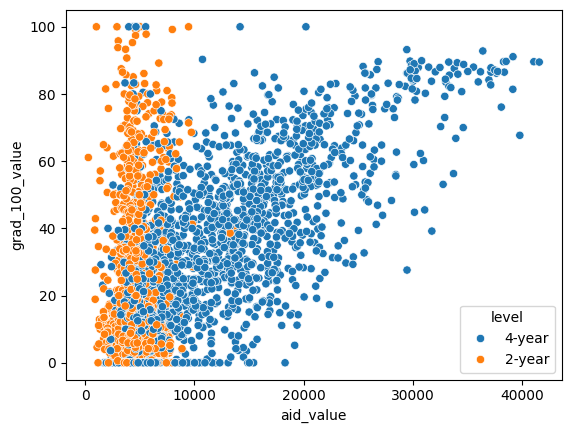

In [33]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.show()

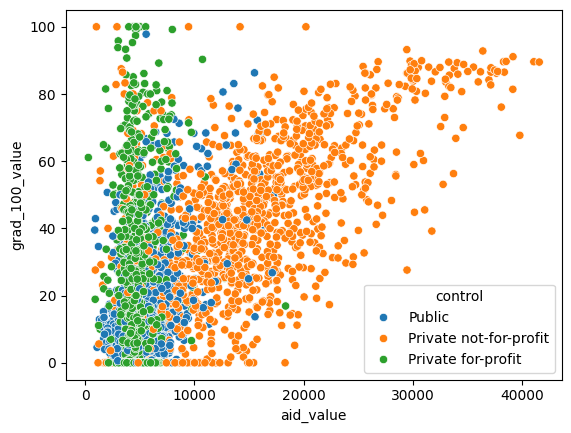

In [35]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.show()

Once again, it appears that 4 year, private, not for profit insitutions give the best aid and have the best graduation rates.

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

#Question 2


In [5]:
! git clone https://www.github.com/DS3001/assignment2



Cloning into 'assignment2'...
fatal: could not read Username for 'https://github.com': No such device or address


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

AirBNB = pd.read_csv('airbnb_hw.csv')
justice = pd.read_parquet('justice_data.parquet')
pretrial = pd.read_csv('pretrial_data.csv')
sharks = pd.read_csv('sharks.csv')
AirBNB.describe()

<ipython-input-2-3b87411dd078>:8: DtypeWarning: Columns (2,5,6,8,80,81,82,83,84,85,109,164,165,166,167,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,271,272,273,274,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,302,303,304,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,4

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000


1

In [ ]:
AirBNB['Price'] = pd.to_numeric(AirBNB['Price'].str.replace(',',''))
AirBNB.isnull().sum().sum()

16871

2

In [ ]:
sharks['Type'].unique()
remove_types = ['Unconfirmed', 'Unverified', 'Invalid', 'Under investigation','nan']
sharks = sharks[~sharks['Type'].isin(remove_types)] # Create a new DataFrame by filtering out rows where the 'Type' column value exists in the remove_types list
sharks

,index,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6457,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,6458,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,6459,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6460,6460,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3

In [18]:
release = justice['WhetherDefendantWasReleasedPretrial'].unique()
release = pd.Series(release).replace(9,np.nan)
justice['WhetherDefendantWasReleasedPretrial'] = release
del release

4

In [20]:
jail_time = justice['ImposedSentenceAllChargeInContactEvent']
type = justice['SentenceTypeAllChargesAtConvictionInContactEvent']

In [ ]:
jail_time = pd.to_numeric(jail_time, errors='coerce')
jail_time_NA = jail_time.isnull()


In [21]:
jail_time = jail_time.mask(type == 4,0)
jail_time = jail_time.mask(type == 9,np.nan)

jail_time_NA = jail_time.isnull
print(pd.crosstab(jail_time_NA,type),'\n')
print(np.sum(jail_time_NA),'\n')

SentenceTypeAllChargesAtConvictionInContactEvent       0     1    2     4    9
row_0                                                                         
<bound method Series.isnull of 0               ...  8720  4299  914  8779  274 

<bound method Series.isnull of 0                     NaN
1                      60
2                      12
3        .985626283367556
4                       0
               ...       
22981                   0
22982                 NaN
22983                   0
22984                   0
22985                   0
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object> 



In [28]:
justice['ImposedSentenceAllChargeInContactEvent'] = jail_time
justice[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']]


,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,NaN,9
1,60,0
2,12,1
3,.985626283367556,1
4,0,4
...,...,...
22981,0,4
22982,NaN,9
22983,0,4
22984,0,4


#QUESTION 3